In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import PIL.ImageOps
import cv2
from tqdm import tqdm
import pickle

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, Activation, Flatten, BatchNormalization
import tensorflow.keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/Google_Colab/Vans_Image_Classifier'
os.chdir(path)

Label Description

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [5]:
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(2, 2), padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(2, 2), padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       3

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32,
          epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 10.0240 - accuracy: 0.1018 - val_loss: 9.9930 - val_accuracy: 0.1003
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 9.9954 - accuracy: 0.1003 - val_loss: 9.9934 - val_accuracy: 0.0997
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9938 - accuracy: 0.0990 - val_loss: 9.9932 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 9.9935 - accuracy: 0.1011 - val_loss: 9.9930 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9929 - accuracy: 0.1028 - val_loss: 9.9929 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9930 - accuracy: 0.1011 - val_loss: 9.9929 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9929 - accuracy: 0.1009 - val_loss: 9.9929 - val_accuracy

In [ ]:
y_pred = model.predict(X_test)
labels[np.argsort(y_pred[0])[-1]]

'Ankle boot'

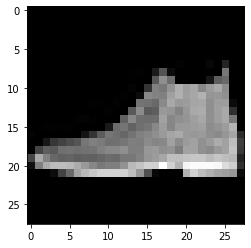

In [ ]:
plt.imshow(X_test[0][:, :, 0], cmap='gray')

That is a high top shoe, not a T-shirt/ Top!

# New Model

In [ ]:
layer_sizes = [32, 64, 128]
dense_layers = [0, 1, 2]
convolution_layers = [2, 3]



for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in convolution_layers:

      model_name = f'{conv_layer}-conv-{layer_size}-neurons-{dense_layer}-dense'
      print(model_name)

      model = Sequential()

      model.add(Conv2D(layer_size, (3, 3), activation='relu'))
      model.add(BatchNormalization())
      model.add(MaxPool2D((2, 2), padding='same'))

      for i in range(conv_layer-1):
        model.add(Conv2D(layer_size, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D((2, 2)))

      model.add(Flatten())

      for i in range(dense_layer):
        model.add(Dense(layer_size, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

      model.add(Dense(10, activation='softmax'))

      model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

      early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min', min_delta=0.3)
      tensorboard = TensorBoard('logs/{}'.format(model_name))

      model.fit(X_train, y_train, batch_size=64, epochs=10, 
                callbacks=[early_stop, tensorboard], validation_data=(X_test, y_test))

2-conv-32-neurons-0-dense
Epoch 1/10
  1/938 [..............................] - ETA: 0s - loss: 4.1590 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
938/938 [==============================] - 7s 7ms/step - loss: 0.4451 - accuracy: 0.8418 - val_loss: 0.3629 - val_accuracy: 0.8708
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3070 - accuracy: 0.8905 - val_loss: 0.3250 - val_accuracy: 0.8864
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2732 - accuracy: 0.9018 - val_loss: 0.3290 - val_accuracy: 0.8822
3-conv-32-neurons-0-dense
Epoch 1/10
938/938 [==============================] - 7s 8ms/step - loss: 0.5245 - accuracy: 0.8133 - val_loss: 0.4324 - val_accuracy: 0.8432
Epoch 2/10
938/938

After viewing with tensorboard by typing tensorboard --logdir=logs/ in the command line, I determined the two models that performed the best were 2-conv-128-neurons-2-dense and 2-conv-256-neurons-2-dense

In [29]:
model_2_conv_128_n_2_dense = Sequential()

model_2_conv_128_n_2_dense.add(Conv2D(32, (3, 3), activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(MaxPool2D((2, 2)))
model_2_conv_128_n_2_dense.add(Dropout(0.5))

model_2_conv_128_n_2_dense.add(Conv2D(32, (3, 3), activation='relu'))
model_2_conv_128_n_2_dense.add(BatchNormalization())
model_2_conv_128_n_2_dense.add(MaxPool2D((2, 2)))
model_2_conv_128_n_2_dense.add(Dropout(0.5))

model_2_conv_128_n_2_dense.add(Flatten())

model_2_conv_128_n_2_dense.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_2_conv_128_n_2_dense.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
                                     metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)

In [30]:
model_2_conv_128_n_2_dense.fit(X_train, y_train, batch_size=64, epochs=20,
                               validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 6s 7ms/step - loss: 1.6952 - accuracy: 0.5299 - val_loss: 0.6833 - val_accuracy: 0.7482
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.9226 - accuracy: 0.7043 - val_loss: 0.5814 - val_accuracy: 0.7814
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.7497 - accuracy: 0.7457 - val_loss: 0.5299 - val_accuracy: 0.8057
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.6535 - accuracy: 0.7698 - val_loss: 0.4930 - val_accuracy: 0.8228
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 0.5905 - accuracy: 0.7893 - val_loss: 0.4678 - val_accuracy: 0.8330
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.5437 - accuracy: 0.8026 - val_loss: 0.4550 - val_accuracy: 0.8370
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.5125 - accuracy: 0.8158 - val_loss: 0.4321 - val_accuracy: 0.8474
Epoch 

In [35]:
model_2_conv_256_n_2_dense = Sequential()

model_2_conv_256_n_2_dense.add(Conv2D(256, (3,3), activation='relu'))
model_2_conv_256_n_2_dense.add(BatchNormalization())
model_2_conv_256_n_2_dense.add(MaxPool2D((2, 2), padding='same'))
model_2_conv_256_n_2_dense.add(Dropout(0.3))

model_2_conv_256_n_2_dense.add(Conv2D(256, (3,3), activation='relu'))
model_2_conv_256_n_2_dense.add(BatchNormalization())
model_2_conv_256_n_2_dense.add(MaxPool2D((2,2)))
model_2_conv_256_n_2_dense.add(Dropout(0.3))

model_2_conv_256_n_2_dense.add(Flatten())

model_2_conv_256_n_2_dense.add(Dense(256, activation='relu'))
model_2_conv_256_n_2_dense.add(BatchNormalization())
model_2_conv_256_n_2_dense.add(Dropout(0.3))

model_2_conv_256_n_2_dense.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)

model_2_conv_256_n_2_dense_opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_2_conv_256_n_2_dense.compile(optimizer=model_2_conv_256_n_2_dense_opt,
                                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model_2_conv_256_n_2_dense.fit(X_train, y_train, batch_size=64, epochs=20,
                               validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 25s 27ms/step - loss: 0.5661 - accuracy: 0.8016 - val_loss: 0.3741 - val_accuracy: 0.8612
Epoch 2/20
938/938 [==============================] - 25s 27ms/step - loss: 0.3795 - accuracy: 0.8653 - val_loss: 0.3021 - val_accuracy: 0.8927
Epoch 3/20
938/938 [==============================] - 25s 27ms/step - loss: 0.3202 - accuracy: 0.8840 - val_loss: 0.2871 - val_accuracy: 0.8949
Epoch 4/20
938/938 [==============================] - 25s 27ms/step - loss: 0.2877 - accuracy: 0.8958 - val_loss: 0.2856 - val_accuracy: 0.8935
Epoch 5/20
938/938 [==============================] - 25s 27ms/step - loss: 0.2638 - accuracy: 0.9057 - val_loss: 0.2766 - val_accuracy: 0.8925
Epoch 6/20
938/938 [==============================] - 25s 27ms/step - loss: 0.2435 - accuracy: 0.9113 - val_loss: 0.2385 - val_accuracy: 0.9106
Epoch 7/20
938/938 [==============================] - 25s 26ms/step - loss: 0.2280 - accuracy: 0.9163 - val_loss: 0.2295 - val_accuracy:

In [34]:
X_train.shape

(60000, 28, 28, 1)

# Importing Images from Vans

In [ ]:
data_path = os.path.join(path, 'data')
os.chdir(data_path)

In [ ]:
df = pd.DataFrame(columns=['img_id', 'label'])
for folder in os.listdir():
  folder_path = os.path.join(data_path, folder)
  os.chdir(folder_path)

  for images in os.listdir():
    df_2 = pd.DataFrame([[images, folder]], columns=['img_id', 'label'])
    df = df.append(df_2)
  
  os.chdir('..')

In [ ]:
X = []

for folder in tqdm(os.listdir()):
  folder_path = os.path.join(data_path, folder)
  os.chdir(folder_path)

  for images in os.listdir():
    img_path = os.path.join(folder_path, images)
    img = image.load_img(img_path, target_size=(28, 28, 1), color_mode='grayscale')
    img = PIL.ImageOps.invert(img)
    img = image.img_to_array(img)
    img /= 255.0
    X.append(img)

X = np.array(X)

In [ ]:
df['label'] = df['label'].map({'T-shirt': 0, 'pants': 1, 'pullovers': 2,
                               'dress': 3, 'coats': 4, 'sandals': 5,
                               'long_sleeve_shirt': 6, 'sneakers': 7,
                               'Bag': 8, 'High Tops': 9})

In [ ]:
X_val = X
y_val = df['label'].reset_index(drop=True)

In [15]:
y_pred_test = model_2_conv_128_n_2_dense.predict(X_val)

In [27]:
labels[np.argsort(y_pred_test[100])[-1]]

'Coat'

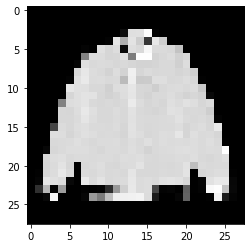

In [28]:
plt.imshow(X_val[100][:, :, 0], cmap='gray')

In [37]:
y_pred_test_256 = model_2_conv_256_n_2_dense.predict(X_val)

In [38]:
labels[np.argsort(y_pred_test_256[200])[-1]]

'Shirt'

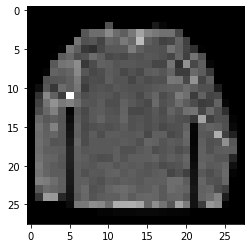

In [39]:
plt.imshow(X_val[200][:, :, 0], cmap='gray')

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
predictions_128_model = [np.argsort(i)[-1] for i in y_pred_test]

predictions_256_model = [np.argsort(i)[-1] for i in y_pred_test_256]

In [82]:
def plot_confusion_matrix(cm, classes, figname, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
 """
 This function prints and plots the confusion matrix.
 Normalization can be applied by setting `normalize=True`.
 """
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 import seaborn as sns
 if normalize:
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')

  sns.set_style('dark')

  plt.figure(figsize=(8,8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  #plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment='center',
    color='white' if cm[i, j] > thresh else 'black')
  
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.savefig(figname)

Confusion matrix, without normalization


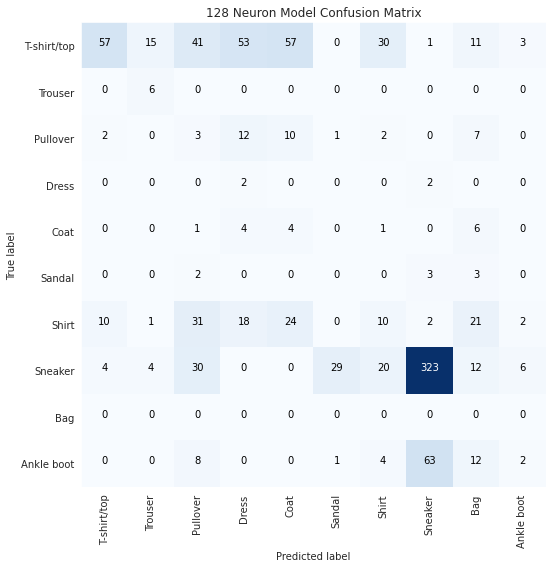

In [88]:
cm_128 = confusion_matrix(y_val, predictions_128_model)
plot_confusion_matrix(cm_128, classes=labels.values(), figname='Confusion_matrix_concrete.jpg',
                      normalize=False, title='128 Neuron Model Confusion Matrix')

In [89]:
print('128 Neuron Classification Report')
print(classification_report(y_val, predictions_128_model))

128 Neuron Classification Report
              precision    recall  f1-score   support

           0       0.78      0.21      0.33       268
           1       0.23      1.00      0.38         6
           2       0.03      0.08      0.04        37
           3       0.02      0.50      0.04         4
           4       0.04      0.25      0.07        16
           5       0.00      0.00      0.00         8
           6       0.15      0.08      0.11       119
           7       0.82      0.75      0.79       428
           8       0.00      0.00      0.00         0
           9       0.15      0.02      0.04        90

    accuracy                           0.42       976
   macro avg       0.22      0.29      0.18       976
weighted avg       0.61      0.42      0.46       976



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


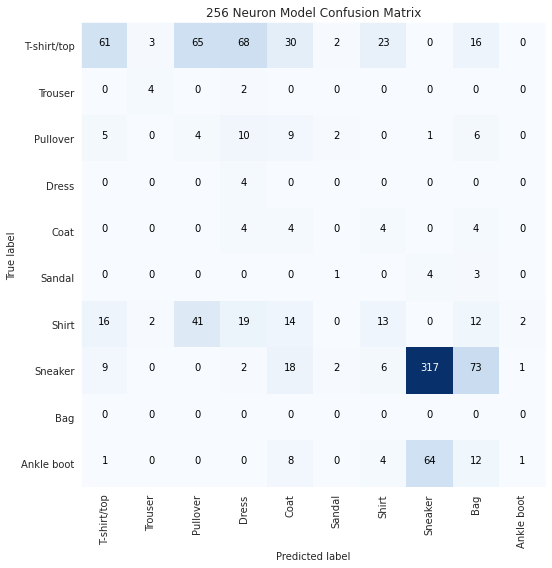

In [90]:
cm_256 = confusion_matrix(y_val, predictions_256_model)
plot_confusion_matrix(cm_256, classes=labels.values(), figname='Confusion_matrix_concrete.jpg',
                      normalize=False, title='256 Neuron Model Confusion Matrix')

In [94]:
print('256 Neuron Classification Report')
print(classification_report(y_val, predictions_256_model))

256 Neuron Classification Report
              precision    recall  f1-score   support

           0       0.66      0.23      0.34       268
           1       0.44      0.67      0.53         6
           2       0.04      0.11      0.05        37
           3       0.04      1.00      0.07         4
           4       0.05      0.25      0.08        16
           5       0.14      0.12      0.13         8
           6       0.26      0.11      0.15       119
           7       0.82      0.74      0.78       428
           8       0.00      0.00      0.00         0
           9       0.25      0.01      0.02        90

    accuracy                           0.42       976
   macro avg       0.27      0.32      0.22       976
weighted avg       0.60      0.42      0.46       976



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
